# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



### 3. Has the network latency gone up since we switched internet service providers?
    - null hypothesis - Network latency did not go up after switching providers
    - alternative hypothesis - Latency has gone up after switching providers
    - true positive - The network latency increased after switching providers due to the new provider having fiber optic instead of DSL
    - true negative - Network latency didn't increase after switching providers because the new provider's nearest server is much further away than your old provider's
    - type I - Network latency increased but not actually due to switching providers but because they just replaced a faulty connection to your house without you knowing about it
    - type II errors - Network latency didn't increase but it's not because we switched providers but because you decided to use your old wifi router instead of paying to rent one from the new internet service provider who you think is to blame

Note: This would be deteremined via a paired t-test, in which we look at a sample of our data under the previous condition (old internet service provider), and then look at a sample of our data under the current dondition (new internet service provider). A paired t-test is used when we are interested in the difference between two variables for the same subject, and often the two variables are separated by time.

### 2. Is the website redesign any good?
    - null hypothesis - The website is not better after the redesign
    - alternative hypothesis - The website is better after the redesign
    - true positive - The website is highly correlated as being better due to the redesign because it loads and functions faster without the old spaghetti code
    (You can not conclusively say that it's DUE TO THE WEBSITE REDESIGN)
    - true negative - The website is not better after the redesign because it throws error codes rendering it unusable
    - type I - The website is not better after the redesign but it actually is, you just think it looks better but it's slower and customers don't like the change
    - type II errors - The website is actually not better after the redesign but it seems like it is

Note: Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign.  If we are launching the new website the day before Black Friday, it is inappropriate to compare that to the previous day.  We would need to compare it to the last website on Black Friday.  Sometimes perfect comparisons are not achievable in the rapidly changing business world, but we must do our best to adequately control for as many factors as we can.  This could be achieved through A?B testing, where we run two versions of the website at the same time and look at...

### 3. Is our television ad driving more sales?

    - null hypothesis - the tv ad is not driving more sales
    - alternative hypothesis - more sales are being driven by the tv ad
    - true positive - The tv ad is the reason why sales are being driven
    - true negative - The tv ad is not helping with driving sales
    - type I - The tv ad is not driving sales but it looks like it is
    - type II errors - the tv ad is helping drive sales but it's actually not.

# T-Test

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env

from pydataset import data
mpg = data('mpg')


1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
- average time(numeric continuous values) for two different groups (categories)
- One sample or two sample?
- One tailed or two tailed?

Form a hypothesis:

In [2]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
# H_a: Average time to sell at office 1 != average time to sell at office 2


In [3]:
alpha = 0.05

In [4]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [5]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


We reject the null hypothesis


- Load the `mpg` dataset and use it to answer the following questions:


In [6]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


**Hypothesis**

- Is there a *difference* (two tailed) in fuel-efficiency in cars from 2008 vs 1999?
    - $H_{0}$: There is no significant difference in total miles per gallon for cars from 2008 and 1999
    - $H_{a}$: The total miles per gallon is significantly different for cars in 2008 vs 1999

**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: 
- Independent: 
- Variance: 

In [7]:
alpha = .05

array([[<AxesSubplot:title={'center':'displ'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'cyl'}>,
        <AxesSubplot:title={'center':'cty'}>],
       [<AxesSubplot:title={'center':'hwy'}>, <AxesSubplot:>]],
      dtype=object)

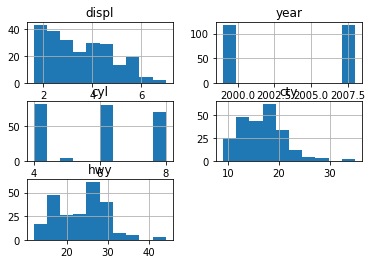

In [8]:
mpg.hist()

In [9]:
mpg_2008_hwy = mpg[mpg.year == 2008].hwy
mpg_1999_hwy = mpg[mpg.year == 1999].hwy

In [10]:
mpg_2008_cty = mpg[mpg.year == 2008].cty
mpg_1999_cty = mpg[mpg.year == 1999].cty

In [11]:
mpg_2008 = (mpg_2008_cty + mpg_2008_hwy)/2
mpg_1999 = (mpg_1999_cty + mpg_1999_hwy)/2

<AxesSubplot:>

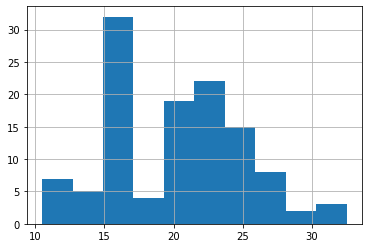

In [12]:
mpg_2008.hist()

<AxesSubplot:>

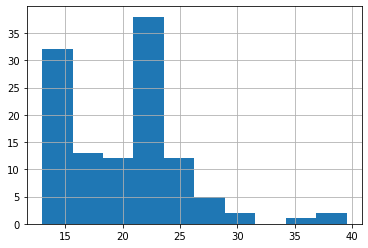

In [13]:
 mpg_1999.hist()

In [14]:
mpg_2008.var()

24.097480106100797

In [15]:
mpg_1999.var()

27.122605363984682

In [16]:
mpg_2008.count(), mpg_1999.count()

(117, 117)

In [17]:
t, p = stats.ttest_ind(mpg_2008, mpg_1999, equal_var= False)

t, p, alpha

(-0.21960177245940962, 0.8263750772060638, 0.05)

It doesn't appear to be a statistically signficant difference with a p-value of 0.8263

**Hypothesis**

- Are compact cars *more* (One sample, one tailed test) fuel-efficient than the average car?
    - $H_{0}$: The fuel-efficiency for compact cars <= mpg for the average car 
    - $H_{a}$: The fuel-efficiency for compact cars > mpg for the average car 

**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: 
- Independent: 
- Variance: 

In [18]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [19]:
mpg['avg_mpg'] = (mpg.hwy + mpg.cty)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [20]:
mpg.rename(columns= {'class': 'type'}, inplace=True)

In [21]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,type,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [22]:
mpg_compact = mpg[mpg.type == 'compact'].avg_mpg
mpg_not_compact = mpg[mpg.type != 'compact'].avg_mpg

In [23]:
mpg_compact.mean()

24.21276595744681

In [24]:
mpg_not_compact.mean()

19.128342245989305

<AxesSubplot:>

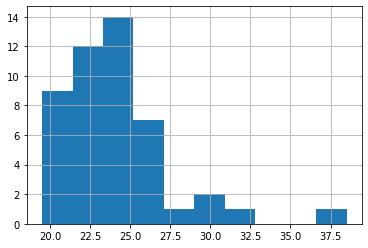

In [25]:
mpg_compact.hist()

<AxesSubplot:>

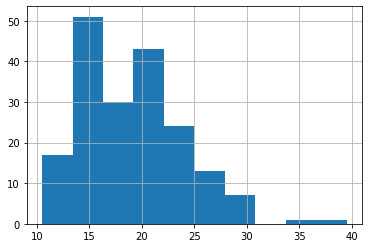

In [26]:
mpg_not_compact.hist()

In [27]:
mpg_compact.var()

12.442876965772433

In [28]:
mpg_not_compact.var()

23.652794548904602

In [29]:
mpg_compact.count()

47

In [30]:
mpg_not_compact.count()

187

In [31]:
t, p = stats.ttest_ind(mpg_compact, mpg_not_compact, equal_var= False)

t, p, alpha

(8.128810422808078, 1.6018060656123074e-12, 0.05)

In [32]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null




**Hypothesis**

- Do manual cars get better gas mileage than automatic cars?
    - $H_{0}$: Manual cars do not get better gas mileage than automatic cars
    - $H_{a}$: Manual cars do get better gas mileage than automatic cars 

**Significance Level**

$\alpha$ = 0.05

**Verify Assumptions**

- Normal: 
- Independent: 
- Variance: 

In [33]:
mpg_auto = mpg[mpg.trans.str.contains('auto')].avg_mpg
mpg_manual = mpg[mpg.trans.str.contains('manual')].avg_mpg


<AxesSubplot:>

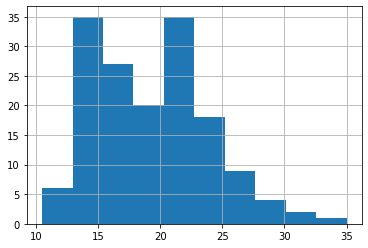

In [34]:
mpg_auto.hist()

<AxesSubplot:>

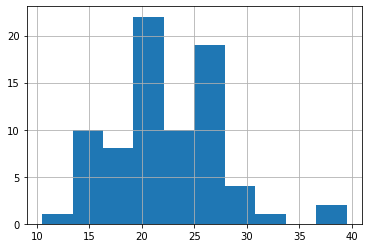

In [35]:
mpg_manual.hist()

In [36]:
mpg_auto.var(), mpg_manual.var()

(21.942777233382337, 26.635167464114826)

In [37]:
stats.levene(mpg_auto, mpg_manual)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [38]:
t, p = stats.ttest_ind(mpg_manual, mpg_auto, equal_var=True)
t, p/2

(4.593437735750014, 3.5771872005728416e-06)

In [39]:
mpg_manual.mean(), mpg_auto.mean()

(22.227272727272727, 19.130573248407643)

In [40]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [41]:

mpg['trans'].str.contains('manual').any()
mpg['trans'].str.contains('auto').any()

True

Yes, manual cars get better gas mileage than automatics overall

In [42]:
# list(filter(lambda x: 'manual' in x,mpg.trans))

In [43]:
# list(filter(lambda x: 'auto' in x,mpg.trans))

## Correlation
### Pearson's Correlation Coefficient

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


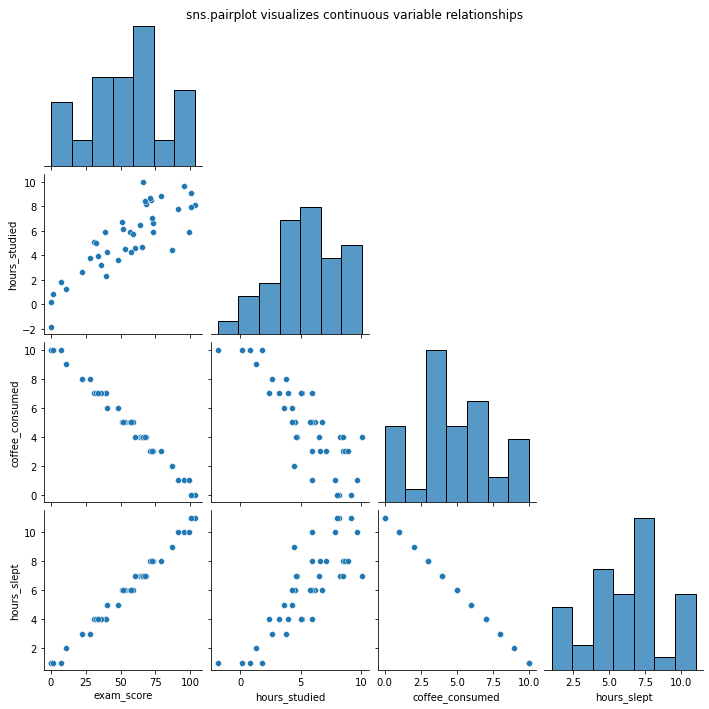

In [45]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

In [46]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [47]:
x = df.hours_studied
y = df.exam_score

def stdev(x):
    variance = ((x - x.mean()) ** 2).sum() / n
    return sqrt(variance)

r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (stdev(x) * stdev(y))
r_xy

0.8351498542413306

In [48]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

9.359998377263368

In [49]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

2.0762953315463266e-11

In [50]:
p < α

True

The Easy Way

In [51]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.8351498542413308, 2.0762953315462826e-11)

1. Use the `telco_churn` data. Does tenure correlate with monthly charges?

In [52]:
from env import get_db_url
telco = pd.read_csv('telco_data.csv')
telco

# Update using SQL connection to internet service type for telco_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2


In [53]:
x = telco.monthly_charges
y = telco.tenure

corr, p = stats.pearsonr(x, y)
corr, p

(0.2471848922499011, 1.2811368994929208e-98)

In [54]:
# I would say that it doesn't correlate that well with each other.

- Total charges?

In [55]:
x = telco.total_charges
x = np.nan_to_num(x)

corr, p = stats.pearsonr(x, y)
corr, p

(0.826117195298786, 0.0)

In [56]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,3.2


In [57]:
# Total charges appears to be highly correlated to tenure

- What happens if you control for phone and internet service?

In [58]:
def corr_tenure_and_monthly(telco):
    return pd.Series(stats.pearsonr(telco.tenure, telco.monthly_charges), index = ['r', 'p'])

In [59]:
# Do stuff faster with this ONE TRICK stakeholders hate!
telco.groupby(['internet_service', 'phone_service']).apply(corr_tenure_and_monthly)

r              p
internet_service phone_service                         
0                1             -0.013521   6.416702e-01
                 2             -0.040833   4.516446e-01
1                0              0.586289   2.699980e-64
                 1              0.559085   3.251189e-87
                 2              0.608609   2.977266e-71
2                1              0.529938   5.607453e-85
                 2              0.573823  3.939472e-170

In [60]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


2. Use the `employees` database.

In [61]:
from env import get_db_url
url = get_db_url('employees')
sql = """
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
"""
salaries = pd.read_sql(sql, url)

- Is there a relationship between how long an employee has been with the company and their salary?

In [62]:
salaries.head()

,tenure,salary
0,4964,88958
1,5181,72527
2,4901,43311
3,4806,74057
4,3790,94692


In [63]:
salaried_emps = pd.read_sql(sql, url)
salaried_emps.head

<bound method NDFrame.head of         tenure  salary
0         4964   88958
1         5181   72527
2         4901   43311
3         4806   74057
4         3790   94692
...        ...     ...
240119    2572   52868
240120    3410   69501
240121    5030   83441
240122    2298   55003
240123     789   77303

[240124 rows x 2 columns]>

In [64]:
stats.pearsonr(salaried_emps.tenure, salaried_emps.salary)

(0.3064625613186086, 0.0)

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [65]:
sql = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''

In [66]:
titled_emps = pd.read_sql(sql, url)
titled_emps.head()

,emp_no,tenure,n_titles
0,10001,4964,1
1,10002,5181,1
2,10003,4901,1
3,10004,4806,2
4,10005,3790,2


In [67]:
stats.pearsonr(titled_emps.tenure, titled_emps.n_titles)

(0.2665989299136399, 0.0)

Again there appear to be a significant but somewhat weak correlation between number of titles and tenure with the company

3. Use the sleepstudy data. Is there a relationship between days and reaction time?

In [68]:
import pydataset
sleep = pydataset.data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [69]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [70]:
stats.pearsonr(sleep.Reaction, sleep.Days)

(0.5352302262650253, 9.894096322214812e-15)

There's a significant correlation between the days without sleep and the subjects reaction time.

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.
|                       | Codeup Student | Not Codeup Student |
|-----------------------|----------------|--------------------|
| Uses a Macbook        | 49             | 20                 |
| Doesn't Use A Macbook | 1              | 30                 |

In [71]:
import pandas as pd
from scipy import stats
from pydataset import data
alpha = 0.05

- Null hypothesis is that using a macbook is independent of being a codeup student
- Alternative hypothesis is that there is some relationship;dependence between Mac use and Codeup

In [72]:
mac=pd.DataFrame({"codeup_student":[49, 1],
                 "not_codeup_student":[20, 30]})
# Can set index and column = to their names then make a DataFrame using pd.DataFrame and matching List, setting the index and columns equal to themsleves
mac.index = ['uses_mac', 'doesn\'t_use_mac']
mac

,codeup_student,not_codeup_student
uses_mac,49,20
doesn't_use_mac,1,30


In [73]:
help(stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

In [74]:
# first_row = mac.iloc[0].tolist()
# first_row

In [75]:
# second_row = mac.iloc[1].tolist()
# second_row

In [76]:
chi2, p, degf, expected = stats.chi2_contingency(mac)
p

1.4116760526193828e-09

In [77]:
if p < alpha:
        print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


2. Choose another 2 categorical variables from the mpg dataset and perform a 
$chi^2$
contingency table test with them. Be sure to state your null and alternative hypotheses.

In [78]:
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [79]:
chi2, p, degf, expected = stats.chi2_contingency(pd.crosstab(mpg.year, mpg.cyl))
p

0.01702768537665195

In [80]:
if p < alpha:
        print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


3. Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    - Null hypothesis = there is no relationship, no dependence, between gender and department
    - We have insufficient evidence to reject the...

In [81]:
from env import get_db_url
url = get_db_url('employees')
sql = """
SELECT * FROM employees AS e
JOIN dept_emp AS de ON de.emp_no = e.emp_no
JOIN departments AS d ON d.dept_no = de.dept_no
WHERE de.to_date = '9999-01-01' AND (dept_name = 'Sales' OR dept_name = 'Marketing');
"""
employees = pd.read_sql(sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,dept_no,from_date,to_date,dept_no,dept_name
0,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,10017,d001,1993-08-03,9999-01-01,d001,Marketing
1,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,10058,d001,1988-04-25,9999-01-01,d001,Marketing
2,10140,1957-03-11,Yucel,Auria,F,1991-03-14,10140,d001,1991-03-14,9999-01-01,d001,Marketing
3,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,10228,d001,1993-01-28,9999-01-01,d001,Marketing
4,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,10239,d001,1996-05-04,9999-01-01,d001,Marketing


In [82]:
gender_vs_dept = pd.crosstab(employees.gender, employees.dept_name)
gender_vs_dept

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [83]:
chi2, p, degf, expected = stats.chi2_contingency(gender_vs_dept)
p

0.5691938610810126

In [84]:
if p < alpha:
        print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


- Is an employee's gender independent of whether or not they are or have been a manager?

In [85]:
from env import get_db_url
url = get_db_url('employees')
sql = """
SELECT * FROM employees AS e
JOIN titles AS t ON t.emp_no = e.emp_no
AND title = 'Manager';
"""
employees = pd.read_sql(sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
0,110022,1956-09-12,Margareta,Markovitch,M,1985-01-01,110022,Manager,1985-01-01,1991-10-01
1,110039,1963-06-21,Vishwani,Minakawa,M,1986-04-12,110039,Manager,1991-10-01,9999-01-01
2,110085,1959-10-28,Ebru,Alpin,M,1985-01-01,110085,Manager,1985-01-01,1989-12-17
3,110114,1957-03-28,Isamu,Legleitner,F,1985-01-14,110114,Manager,1989-12-17,9999-01-01
4,110183,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,110183,Manager,1985-01-01,1992-03-21


In [86]:
gender_vs_manager = pd.crosstab(employees.gender, employees.title)
gender_vs_manager

title,Manager
gender,
F,13
M,11


In [87]:
chi2, p, degf, expected = stats.chi2_contingency(gender_vs_manager)
p

1.0

In [88]:
if p < alpha:
        print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


In [89]:
import itertools # for making the combinations for choosing all mpg data set combinations